Commencing processing of file 612
size of data array is (512, 512, 17)
Ash pixels detected on first iteration: 14342


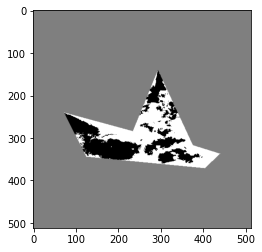

In [152]:
import numpy as np
from matplotlib import pyplot as plt
import glob

In [ ]:
my_arr_path = "E:\\POLYGON_TRAINING"
array_path = my_arr_path
i = 612



print(f"Commencing processing of file {i}")
array_names = glob.glob(f"{array_path}\\*.npy")
data_array = np.load(array_names[i])
print(f"size of data array is {np.shape(data_array)}")
b14 = data_array[:, :, 13]
b15 = data_array[:, :, 14]
b14_max = np.nanmax(b14)
idxs, idys = np.where(b14 == np.nanmax(b14))
idx, idy = idxs[0], idys[0]
polygon_array = data_array[:, :, 16]
area = np.count_nonzero(polygon_array)
btd_uncorrected = b14 - b15
btd_Tmax = btd_uncorrected[idx, idy]
b0 = 6. - np.log(np.abs(btd_Tmax))
btd = b14 - b15 - np.exp(6. * (b14 / b14_max) - b0)
btd_masked = btd*polygon_array
ash = -np.sign(btd_masked)
plt.imshow(ash,cmap = "binary")
ash_pixel_count = np.count_nonzero(ash*polygon_array == 1.0)
print("Ash pixels detected on first iteration: " + str(ash_pixel_count))
ash_fraction = ash_pixel_count / area
ash_map_new = ash
k = 0
b_step = 0.02

Ash fraction good. Outputting ash map...


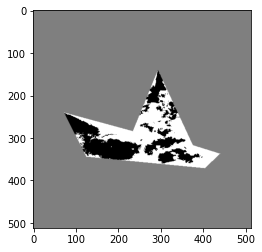

In [153]:
if ash_fraction > 0.3 and ash_fraction < 0.85:
    print("Ash fraction good. Outputting ash map...")
while ash_fraction < 0.3 or ash_fraction > 0.85:  # note this could end up in an infinite loop
    k += 1
    if ash_fraction < 0.3:
        print("Too little ash. Decreasing b (increasing wv correction).")
        b0 -= b_step
        btd = b14 - b15 - np.exp(6. * (b14 / b14_max) - b0)
        btd_masked = btd * polygon_array
        ash_map_new = -np.sign(btd_masked)
        ash_pixel_count_new = np.count_nonzero(ash_map_new == 1.0)
        print("Ash pixel count: " + str(ash_pixel_count_new))
        ash_fraction = ash_pixel_count_new / area
    if ash_fraction > 0.85:
        print("Too much ash. Increasing b (decreasing wv correction).")
        b0 += b_step
        btd = b14 - b15 - np.exp(6. * (b14 / b14_max) - b0)
        btd_masked = btd * polygon_array
        ash_map_new = -np.sign(btd_masked)
        ash_pixel_count_new = np.count_nonzero(ash_map_new == 1.0)
        print("Ash pixel count: " + str(ash_pixel_count_new))
        ash_fraction = ash_pixel_count_new / area
    if k > 75:
        print("Ash percentage too sensitive. (Loop taking too long) ")
        btd_masked = btd * polygon_array
        ash_map_new = -np.sign(btd_masked)
        ash_pixel_count_new = np.count_nonzero(ash_map_new == 1.0)
        ash_fraction = ash_pixel_count_new / area
        break

data_array[:, :, 16] = np.nan_to_num(polygon_array * ash_map_new)
plt.show()
plt.imshow(data_array[:,:,16], cmap = "binary")

Save name is E:\BTD_POLYGON_TRAINING\NISHINOSHIMA-20200801_0520_btd.npy


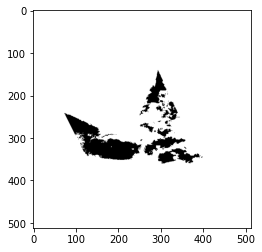

In [154]:
ashes = data_array[:, :, 16]
data_array[:, :, 16] = 0.5*(1+np.sign((np.sign(ashes - 0.1)+1)-0.1))
save_name = f"E:\\BTD_POLYGON_TRAINING\\{array_names[i][20:-4]}_btd.npy"
print(f"Save name is {save_name}")
plt.imshow(data_array[:,:,16], cmap = "binary")
#np.save(save_name, data_array)

#if __name__ == "__main__":
   # main()


In [1]:
from matplotlib import pyplot as plt
import glob
import numpy as np
import os
array_names = glob.glob("E:\\NEW_TRAINING_NORTH\\*.npy")
for o in range(570):
    print(f"Checking file {o}")
    data_array = np.load(array_names[o])
    ashes = data_array[:,:,16]
    ash_count = np.nansum(ashes)
    print(f"ash count is {ash_count}")
    if ash_count < 128:
        os.remove(array_names[o])
        print(f"file at {array_names[o]} removed because there are only {ash_count} ash pixels")



Checking file 0
ash count is 144.0
Checking file 1
ash count is 1555.0
Checking file 2
ash count is 4664.0
Checking file 3
ash count is 8844.0
Checking file 4
ash count is 1913.0
Checking file 5
ash count is 1616.0
Checking file 6
ash count is 3975.0
Checking file 7
ash count is 4210.0
Checking file 8
ash count is 3182.0
Checking file 9
ash count is 529.0
Checking file 10
ash count is 1116.0
Checking file 11
ash count is 2939.0
Checking file 12
ash count is 477.0
Checking file 13
ash count is 103.0
file at E:\NEW_TRAINING_NORTH\KARYMSKY-20200509_2320.npy removed because there are only 103.0 ash pixels
Checking file 14
ash count is 147.0
Checking file 15
ash count is 197.0
Checking file 16
ash count is 131.0
Checking file 17
ash count is 267.0
Checking file 18
ash count is 178.0
Checking file 19
ash count is 58.0
file at E:\NEW_TRAINING_NORTH\KARYMSKY-20200529_1720.npy removed because there are only 58.0 ash pixels
Checking file 20
ash count is 722.0
Checking file 21
ash count is 1037.0

In [158]:

from matplotlib import pyplot as plt
import glob
import numpy as np
array_names = glob.glob("E:\\BTD_POLYGON_TRAINING\\*.npy")
for o in range(0,len(array_names)):
    print(f"Checking file {o}")
    data_array = np.load(array_names[o])
    ashes = np.nan_to_num(data_array[:,:,16],0)
    IR = data_array[:,:,14]
    name_end = array_names[o][25:-4]
    plt.imsave(f"E:\\BTD_TEST_IMAGES\\{name_end}_ash.png",ashes,cmap = "binary")
    #plt.imsave(f"E:\\BTD_TEST_IMAGES\\{name_end}_IR_15.png",np.nan_to_num(IR,200),cmap = "binary")
    #plt.imsave(f"E:\\BTD_TEST_IMAGES\\{name_end}_BTD.png",np.nan_to_num(data_array[:,:,13]-data_array[:,:,14]),cmap = "RdBu", vmin = -5, vmax = 5)

Checking file 0
Checking file 1
Checking file 2
Checking file 3
Checking file 4
Checking file 5
Checking file 6
Checking file 7
Checking file 8
Checking file 9
Checking file 10
Checking file 11
Checking file 12
Checking file 13
Checking file 14
Checking file 15
Checking file 16
Checking file 17
Checking file 18
Checking file 19
Checking file 20
Checking file 21
Checking file 22
Checking file 23
Checking file 24
Checking file 25
Checking file 26
Checking file 27
Checking file 28
Checking file 29
Checking file 30
Checking file 31
Checking file 32
Checking file 33
Checking file 34
Checking file 35
Checking file 36
Checking file 37
Checking file 38
Checking file 39
Checking file 40
Checking file 41
Checking file 42
Checking file 43
Checking file 44
Checking file 45
Checking file 46
Checking file 47
Checking file 48
Checking file 49
Checking file 50
Checking file 51
Checking file 52
Checking file 53
Checking file 54
Checking file 55
Checking file 56
Checking file 57
Checking file 58
Checkin